<a href="https://colab.research.google.com/github/dhyan1999/Artificial-Intelligence/blob/master/Deep%20Learning/LSTM_predict_India_Corona_Virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df_confirmed = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

In [ ]:
country = "India"
df_confirmed1 = df_confirmed[df_confirmed["Country/Region"] == country]

df_confirmed1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
146,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,11139516,11156923,11173761,11192045,11210799,11229398,11244786,11262707,11285561,11308846,11333728,11359048,11385339,11409831,11438734,11474605,11514331,11555284,11599130,11646081,11686796,11734058,11787534,11846652,11908910,11971624,12039644,12095855,12149335,12221665,12303131,12392260,12485509,12589067,12686049,12801785,12928574,13060542,13205926,13358805


In [ ]:
df_confirmed2 = pd.DataFrame(df_confirmed1[df_confirmed1.columns[4:]].sum(),columns=["confirmed"])
df_confirmed2.index = pd.to_datetime(df_confirmed2.index,format='%m/%d/%y')
df_confirmed2

,confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2021-04-06,12801785
2021-04-07,12928574
2021-04-08,13060542
2021-04-09,13205926


,confirmed
2021-04-01,12303131
2021-04-02,12392260
2021-04-03,12485509
2021-04-04,12589067
2021-04-05,12686049
2021-04-06,12801785
2021-04-07,12928574
2021-04-08,13060542
2021-04-09,13205926
2021-04-10,13358805


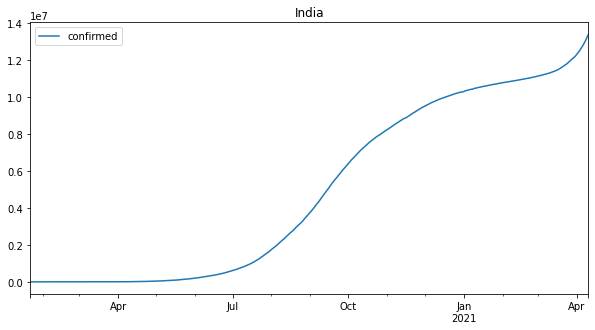

In [ ]:
df_confirmed2.plot(figsize=(10,5),title="India")
df_new = df_confirmed2[["confirmed"]]
df_new.tail(10)

In [ ]:
len(df_new)
x = len(df_new) - 5
x

440

In [ ]:
train=df_new.iloc[:x]
test = df_new.iloc[x:]
train

,confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2021-04-01,12303131
2021-04-02,12392260
2021-04-03,12485509
2021-04-04,12589067


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_train.shape

(440, 1)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  ## number of steps
n_features = 1 
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size=1)
len(generator)

435

In [ ]:
x,y = generator[75]
x,y


(array([[[0.00037663],
         [0.00041865],
         [0.00046634],
         [0.00053011],
         [0.00059893]]]), array([[0.00066577]]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 75)                11325     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_set = np.append(scaled_train[76],scaled_test)
validation_set=validation_set.reshape(6,1)
validation_set

array([[4.18648864e-04],
       [1.00912309e+00],
       [1.01911746e+00],
       [1.02952007e+00],
       [1.04098021e+00],
       [1.05303117e+00]])

In [ ]:
n_input = 5
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length=5,batch_size=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [ ]:
model.fit_generator(generator,validation_data=validation_gen,epochs=100,callbacks=[early_stop],steps_per_epoch=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 4s 67ms/step - loss: 0.2123 - val_loss: 0.8615
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 0.1500 - val_loss: 0.5793
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0750 - val_loss: 0.3053
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0497 - val_loss: 0.0385
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0223 - val_loss: 0.0609
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0048 - val_loss: 0.0412
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0278
Epoch 8/100
10/10 [==============================] - 0s 14ms/step - loss: 7.9236e-04 - val_loss: 0.0476
Epoch 9/100
10/10 [==============================] - 0s 14ms/step - loss: 4.5811e-04 - val_loss: 0.0485
Epoch 10/100
10/10 [==============================] - 0s 15ms/step - loss: 5.1120e-04 - val_

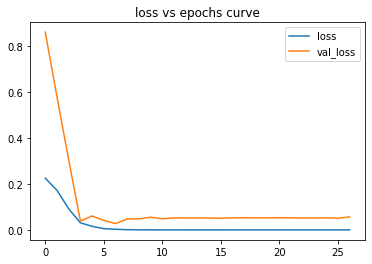

In [ ]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

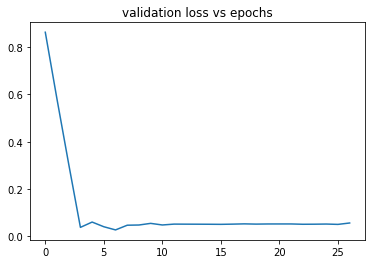

In [ ]:
myloss = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(myloss)),myloss)

Forecast

In [ ]:
##Forecast
test_prediction = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input,n_features)

In [ ]:
for i in range(len(test)+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_prediction = scaler.inverse_transform(test_prediction)
true_prediction[:,0]

array([13660951.41216409, 13965589.6067977 , 14335581.62503767,
       14753216.98144484, 15234282.52236021, 15808473.6702143 ,
       16302138.13984573, 16844307.9557308 , 17430304.07748449,
       18065569.25441051, 18747342.03604245, 19465145.24339283])

In [ ]:
time_series_array = test.index
for k in range(0,7):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))
time_series_array

DatetimeIndex(['2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
df_forecast = pd.DataFrame(columns=["confirmed","confirmed_predicted"],index=time_series_array)
df_forecast.loc[:,"confirmed_predicted"] = true_prediction[:,0]
df_forecast.loc[:,"confirmed"] = test["confirmed"]
df_forecast

,confirmed,confirmed_predicted
2021-04-06,12801785.0,1.366095e+07
2021-04-07,12928574.0,1.396559e+07
2021-04-08,13060542.0,1.433558e+07
2021-04-09,13205926.0,1.475322e+07
2021-04-10,13358805.0,1.523428e+07
2021-04-11,NaN,1.580847e+07
2021-04-12,NaN,1.630214e+07
2021-04-13,NaN,1.684431e+07
2021-04-14,NaN,1.743030e+07
2021-04-15,NaN,1.806557e+07


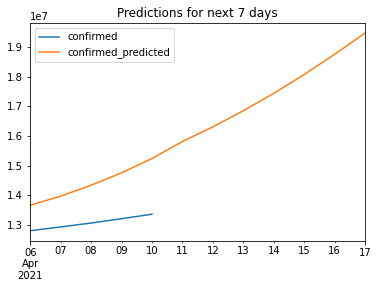

In [ ]:
df_forecast.plot(title="Predictions for next 7 days")

In [ ]:
MAPE = np.mean(np.abs(np.array(df_forecast["confirmed"][:5]) - np.array(df_forecast["confirmed_predicted"][:5]))/np.array(df_forecast["confirmed"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 10.05017000145604 %


In [ ]:
sum_errs = np.sum((np.array(df_forecast["confirmed"][:5]) - np.array(df_forecast["confirmed_predicted"][:5]))**2)
sum_errs

9350819656088.012

In [ ]:
stdev = np.sqrt(1/(5-2) * sum_errs)
stdev

1765485.7363804076

In [ ]:
interval = 1.96 * stdev
interval

3460352.0433055987

In [ ]:
df_forecast["confirm_min"] = df_forecast["confirmed_predicted"] - interval
df_forecast["confirm_max"] = df_forecast["confirmed_predicted"] + interval
df_forecast

,confirmed,confirmed_predicted,confirm_min,confirm_max
2021-04-06,12801785.0,1.366095e+07,1.020060e+07,1.712130e+07
2021-04-07,12928574.0,1.396559e+07,1.050524e+07,1.742594e+07
2021-04-08,13060542.0,1.433558e+07,1.087523e+07,1.779593e+07
2021-04-09,13205926.0,1.475322e+07,1.129286e+07,1.821357e+07
2021-04-10,13358805.0,1.523428e+07,1.177393e+07,1.869463e+07
2021-04-11,NaN,1.580847e+07,1.234812e+07,1.926883e+07
2021-04-12,NaN,1.630214e+07,1.284179e+07,1.976249e+07
2021-04-13,NaN,1.684431e+07,1.338396e+07,2.030466e+07
2021-04-14,NaN,1.743030e+07,1.396995e+07,2.089066e+07
2021-04-15,NaN,1.806557e+07,1.460522e+07,2.152592e+07


In [ ]:
df_forecast["Model Accuracy"] = round((1-MAPE),2)
df_forecast

,confirmed,confirmed_predicted,confirm_min,confirm_max,Model Accuracy
2021-04-06,12801785.0,1.366095e+07,1.020060e+07,1.712130e+07,0.9
2021-04-07,12928574.0,1.396559e+07,1.050524e+07,1.742594e+07,0.9
2021-04-08,13060542.0,1.433558e+07,1.087523e+07,1.779593e+07,0.9
2021-04-09,13205926.0,1.475322e+07,1.129286e+07,1.821357e+07,0.9
2021-04-10,13358805.0,1.523428e+07,1.177393e+07,1.869463e+07,0.9
2021-04-11,NaN,1.580847e+07,1.234812e+07,1.926883e+07,0.9
2021-04-12,NaN,1.630214e+07,1.284179e+07,1.976249e+07,0.9
2021-04-13,NaN,1.684431e+07,1.338396e+07,2.030466e+07,0.9
2021-04-14,NaN,1.743030e+07,1.396995e+07,2.089066e+07,0.9
2021-04-15,NaN,1.806557e+07,1.460522e+07,2.152592e+07,0.9


In [ ]:
from datetime import datetime
df_forecast["Country"] = country
df_forecast

,confirmed,confirmed_predicted,confirm_min,confirm_max,Model Accuracy,Country
2021-04-06,12801785.0,1.366095e+07,1.020060e+07,1.712130e+07,0.9,India
2021-04-07,12928574.0,1.396559e+07,1.050524e+07,1.742594e+07,0.9,India
2021-04-08,13060542.0,1.433558e+07,1.087523e+07,1.779593e+07,0.9,India
2021-04-09,13205926.0,1.475322e+07,1.129286e+07,1.821357e+07,0.9,India
2021-04-10,13358805.0,1.523428e+07,1.177393e+07,1.869463e+07,0.9,India
2021-04-11,NaN,1.580847e+07,1.234812e+07,1.926883e+07,0.9,India
2021-04-12,NaN,1.630214e+07,1.284179e+07,1.976249e+07,0.9,India
2021-04-13,NaN,1.684431e+07,1.338396e+07,2.030466e+07,0.9,India
2021-04-14,NaN,1.743030e+07,1.396995e+07,2.089066e+07,0.9,India
2021-04-15,NaN,1.806557e+07,1.460522e+07,2.152592e+07,0.9,India


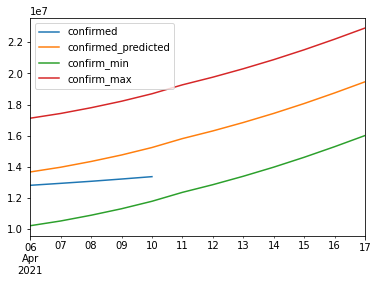

In [ ]:
df_forecast.iloc[:,:4].plot()

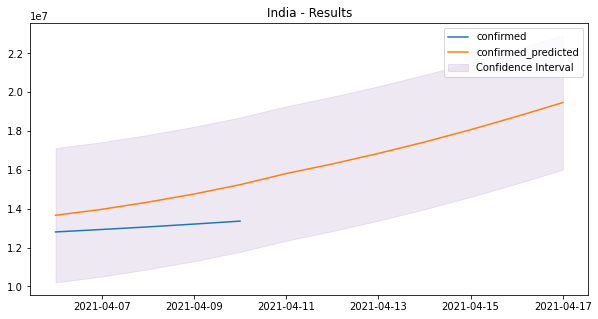

In [ ]:
fig= plt.figure(figsize=(10,5))
plt.title("{} - Results".format(country))
plt.plot(df_forecast.index,df_forecast["confirmed"],label="confirmed")
plt.plot(df_forecast.index,df_forecast["confirmed_predicted"],label="confirmed_predicted")
plt.fill_between(df_forecast.index,df_forecast["confirm_min"],df_forecast["confirm_max"],color="indigo",alpha=0.09,label="Confidence Interval")
plt.legend()
plt.show()